In [ ]:
path = "MyDrive/DSAIL"
def mount_drive():
  from google.colab import drive
  mount_location = '/content/drive'
  drive.mount(mount_location,force_remount=True)
  return mount_location
import os, sys
mount_location = mount_drive()
print("your google drive is mounted at: ", mount_location)
path = os.path.join(mount_location,path) # "/content/drive/MyDrive/"
if os.path.exists(path):
  print("Path exists\n\t", path)
  sys.path.append(path)
  print("Path added (file under this path automatically identified)\n\t", path)
  os.chdir(path)
else :
  raise ValueError("Path does not exist. Set proper path \n", path)

Mounted at /content/drive
your google drive is mounted at:  /content/drive
Path exists
	 /content/drive/MyDrive/problem4
Path added (file under this path automatically identified)
	 /content/drive/MyDrive/problem4


## Import package and set serveral configs

In [ ]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from math import sqrt
from HW4_1_YourAnswer import *
from utils import *

%load_ext autoreload
%autoreload 2

In [ ]:
from types import SimpleNamespace

# The config is used to store various hyperparameters
# you don't need to change it
# you can access the hyperparameters by config.xxx
config = SimpleNamespace(
    seed = 1,
    batch_size = 256,
    test_batch_size = 100,
    lr = 2e-4,
    epoch = 10,
    latent_dim = 2,
    input_shape = (1,16,16),
    hidden_dims = [256,128,64,32],
    expand_dim = 2,
    beta = 2,
)

In [ ]:
# Check device is 'cuda' if GPU is available
device = 'cpu' if not torch.cuda.is_available() else 'cuda'
device

'cuda'

In [ ]:
# set randomness
set_randomness(config.seed)

In [ ]:
from VAE import Encoder
# for AE and VAE
encoder = Encoder(hidden_dims = config.hidden_dims,
                  latent_dim=config.latent_dim,model_name='AE').to(device) # or model_name='VAE'
print(encoder)

Encoder(
  (model): Sequential(
    (0): Conv2d(1, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
  )
  (fc_mean): Linear(in_features=32, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=True)
)


In [ ]:
encoder = Encoder(hidden_dims = config.hidden_dims,
                  latent_dim=config.latent_dim,model_name='AE').to(device)
image = cv2.imread("./test_file/GAN_0050.png",cv2.IMREAD_GRAYSCALE)[2:18,2:18]
image = image/255
image = torch.Tensor(image).unsqueeze(0).unsqueeze(0).repeat(2,1,1,1).to(device)
out = encoder(image)
print(out.shape)

torch.Size([2, 2])


In [ ]:
encoder = Encoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,
                  model_name='VAE').to(device)
eps = torch.Tensor([0.1,-0.01]).to(device)
mu = torch.Tensor([-0.1,0.01]).to(device)
logvar = torch.Tensor([0.1,0.1]).to(device)
out = encoder.reparametrize(mu, logvar,eps)
print(out)

tensor([ 0.0051, -0.0005], device='cuda:0')


In [ ]:
image = cv2.imread("./test_file/GAN_0050.png",cv2.IMREAD_GRAYSCALE)[2:18,2:18]
image = image/255
image = torch.Tensor(image).unsqueeze(0).unsqueeze(0).repeat(2,1,1,1).to(device)
mean, logvar, rp = encoder(image)
print(mean.shape, logvar.shape, rp.shape)

torch.Size([2, 2]) torch.Size([2, 2]) torch.Size([2, 2])


In [ ]:
from VAE import *
decoder = Decoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,expand_dim=config.expand_dim).to(device)
print(decoder)

Decoder(
  (input_layer): Linear(in_features=2, out_features=128, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
  )
  (last_layer): Sequential(
    (0): ConvTranspose2d(256, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid()
  )
)


In [ ]:
from VAE import *
loader_for_test = dataloader(train=False, batch_size=config.batch_size)
print(loader_for_test.transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 136184320.63it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 27757950.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45066998.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 27974344.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Compose(
    Resize(size=(16, 16), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


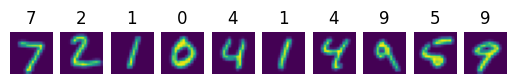

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
img = img.numpy().transpose(0,2,3,1)
label = label.numpy().squeeze()
for i in range(10):
  train_x = img[i]
  train_y = label[i]

  ax = fig.add_subplot(1, 10, i+1)
  ax.imshow(train_x)
  ax.set_title(str(train_y.item()))
  ax.axis("off")

plt.show()

If training sequence of AE is implemented correctly, the below cell is executed without error and print the following result:


Epoch [1/10], Step [235/234], Total loss : 64.666122 Recon Loss: 64.666122, KLD Loss: -0.000000: 100%|██████████| 234/234 [00:21<00:00, 10.94it/s]


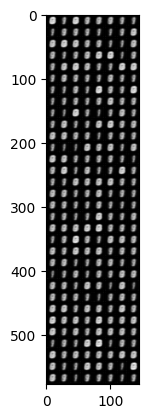

Epoch [2/10], Step [235/234], Total loss : 61.285149 Recon Loss: 61.285149, KLD Loss: 0.000000: 100%|██████████| 234/234 [00:21<00:00, 10.81it/s]


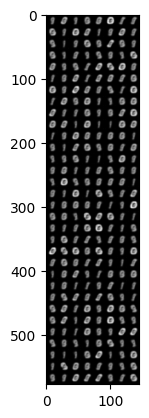

Epoch [3/10], Step [235/234], Total loss : 59.675064 Recon Loss: 59.675064, KLD Loss: -0.000000: 100%|██████████| 234/234 [00:21<00:00, 10.82it/s]


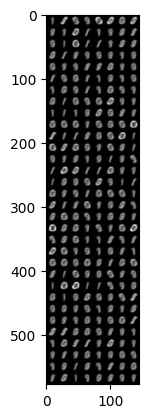

Epoch [4/10], Step [235/234], Total loss : 60.138344 Recon Loss: 60.138344, KLD Loss: -0.000000: 100%|██████████| 234/234 [00:22<00:00, 10.49it/s]


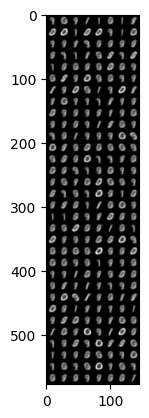

Epoch [5/10], Step [235/234], Total loss : 148116740335407357786061690372096.000000 Recon Loss: 57.176392, KLD Loss: 148116740335407357786061690372096.000000: 100%|██████████| 234/234 [00:22<00:00, 10.61it/s]


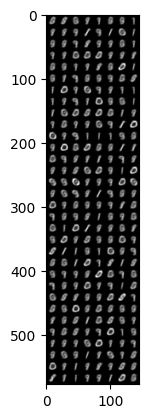

Epoch [6/10], Step [235/234], Total loss : 142141977478301380561795429695488.000000 Recon Loss: 56.260265, KLD Loss: 142141977478301380561795429695488.000000: 100%|██████████| 234/234 [00:22<00:00, 10.31it/s]


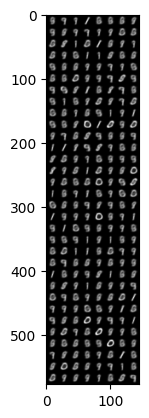

Epoch [7/10], Step [235/234], Total loss : 56.170494 Recon Loss: 56.170494, KLD Loss: -0.000000: 100%|██████████| 234/234 [00:22<00:00, 10.30it/s]


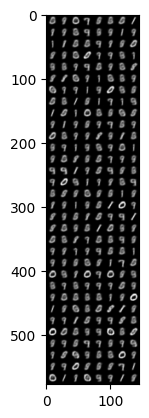

Epoch [8/10], Step [235/234], Total loss : 58.779125 Recon Loss: 58.779125, KLD Loss: 0.000000: 100%|██████████| 234/234 [00:22<00:00, 10.25it/s]


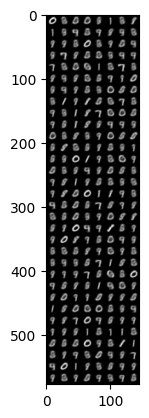

Epoch [9/10], Step [235/234], Total loss : 121190461283415962099265201766400.000000 Recon Loss: 55.336159, KLD Loss: 121190461283415962099265201766400.000000: 100%|██████████| 234/234 [00:23<00:00, 10.02it/s]


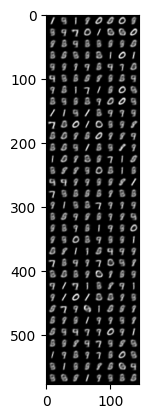

Epoch [10/10], Step [235/234], Total loss : 55.476727 Recon Loss: 55.476727, KLD Loss: 0.000000: 100%|██████████| 234/234 [00:23<00:00, 10.15it/s]


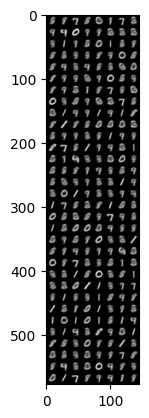

Saving gif file...


In [ ]:
from VAE import *
from utils import initialize_weights

train_loader = dataloader(train=True, batch_size=config.batch_size)
test_loader = dataloader(train=False, batch_size=config.batch_size)
encoder = Encoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,
                  model_name='AE').to(device)
decoder = Decoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,expand_dim=config.expand_dim).to(device)
encoder.apply(initialize_weights)
decoder.apply(initialize_weights)
trainer = training_VAE(train_loader, test_loader,encoder, decoder, device, config, \
                       save_img=True,model_name='AE',beta=config.beta,img_show=True)
results_AE = trainer.train()

In [ ]:
trained_encoder_AE = results_AE['encoder']
trained_decoder_AE = results_AE['decoder']
recon_loss_AE = results_AE['Recon_loss_history']

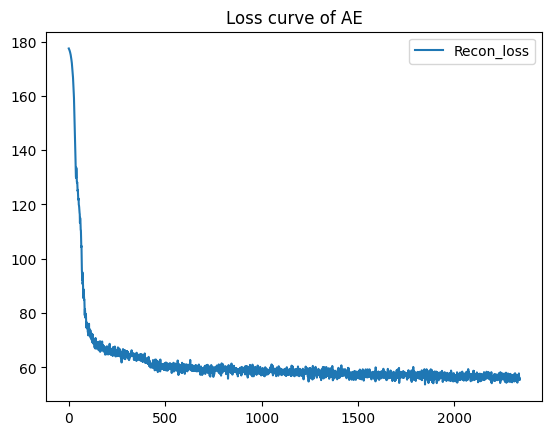

In [ ]:
plt.title("Loss curve of AE")
plt.plot(recon_loss_AE, label='Recon_loss')
plt.legend()

Epoch [1/10], Step [235/234], Total loss : 67.795182 Recon Loss: 67.153152, KLD Loss: 0.642029: 100%|██████████| 234/234 [00:22<00:00, 10.22it/s]


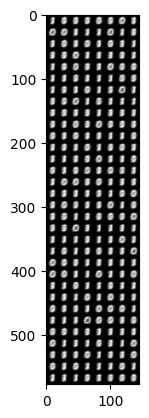

Epoch [2/10], Step [235/234], Total loss : 64.890133 Recon Loss: 63.630028, KLD Loss: 1.260105: 100%|██████████| 234/234 [00:22<00:00, 10.60it/s]


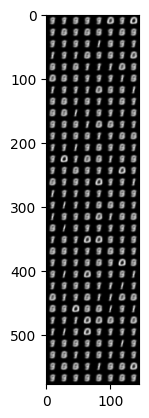

Epoch [3/10], Step [235/234], Total loss : 65.256702 Recon Loss: 63.828873, KLD Loss: 1.427830: 100%|██████████| 234/234 [00:22<00:00, 10.18it/s]


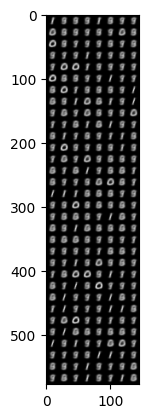

Epoch [4/10], Step [235/234], Total loss : 64.234791 Recon Loss: 62.668625, KLD Loss: 1.566166: 100%|██████████| 234/234 [00:23<00:00,  9.91it/s]


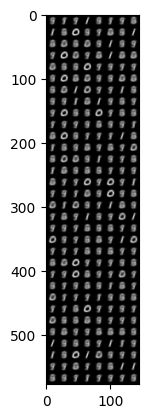

Epoch [5/10], Step [235/234], Total loss : 62.633856 Recon Loss: 61.049664, KLD Loss: 1.584192: 100%|██████████| 234/234 [00:22<00:00, 10.24it/s]


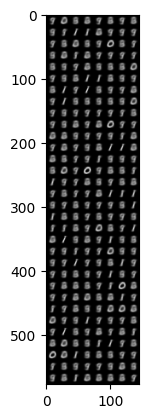

Epoch [6/10], Step [235/234], Total loss : 61.780610 Recon Loss: 59.184021, KLD Loss: 2.596589: 100%|██████████| 234/234 [00:23<00:00, 10.13it/s]


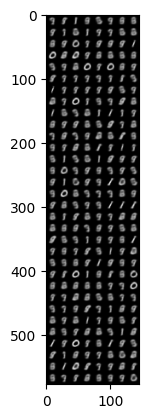

Epoch [7/10], Step [235/234], Total loss : 61.254003 Recon Loss: 58.199211, KLD Loss: 3.054791: 100%|██████████| 234/234 [00:22<00:00, 10.25it/s]


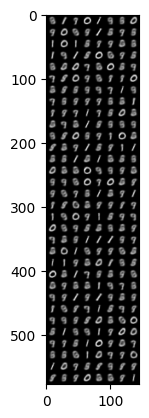

Epoch [8/10], Step [235/234], Total loss : 59.478822 Recon Loss: 56.457600, KLD Loss: 3.021223: 100%|██████████| 234/234 [00:23<00:00,  9.98it/s]


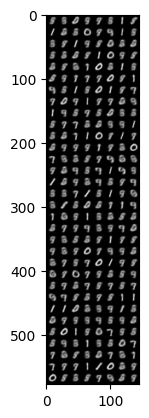

Epoch [9/10], Step [235/234], Total loss : 60.212730 Recon Loss: 56.947914, KLD Loss: 3.264816: 100%|██████████| 234/234 [00:22<00:00, 10.20it/s]


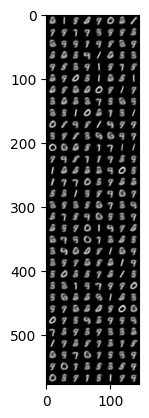

Epoch [10/10], Step [235/234], Total loss : 58.439490 Recon Loss: 54.979824, KLD Loss: 3.459666: 100%|██████████| 234/234 [00:23<00:00,  9.80it/s]


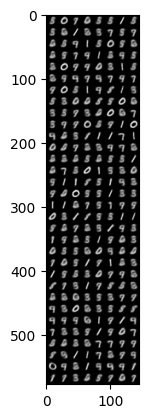

Saving gif file...


In [ ]:
from VAE import *
from utils import initialize_weights
config.beta = 1
train_loader = dataloader(train=True, batch_size=config.batch_size)
test_loader = dataloader(train=False, batch_size=config.batch_size)
encoder = Encoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,model_name='VAE').to(device)
decoder = Decoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,expand_dim=config.expand_dim).to(device)
encoder.apply(initialize_weights)
decoder.apply(initialize_weights)
trainer = training_VAE(train_loader, test_loader,encoder, decoder, device, config, \
                       save_img=True,model_name='VAE',beta=config.beta,img_show=True)
results_VAE = trainer.train()

In [ ]:
trained_encoder_VAE = results_VAE['encoder']
trained_decoder_VAE = results_VAE['decoder']
recon_loss_VAE= results_VAE['Recon_loss_history']
KLD_loss_VAE= results_VAE['KLD_loss_history']

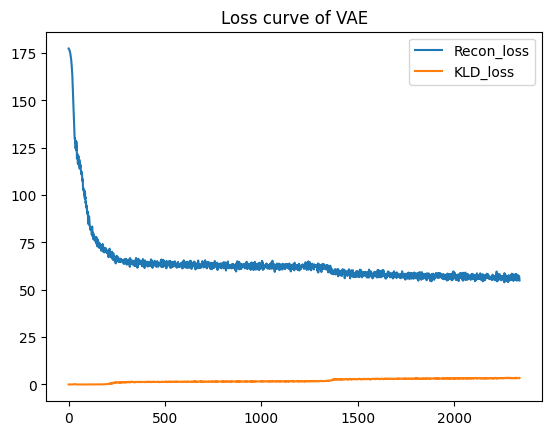

In [ ]:
plt.title("Loss curve of VAE")
plt.plot(recon_loss_VAE, label='Recon_loss')
plt.plot(KLD_loss_VAE, label='KLD_loss')
plt.legend()

Epoch [1/10], Step [235/234], Total loss : 70.390313 Recon Loss: 70.248207, KLD Loss: 0.142106: 100%|██████████| 234/234 [00:21<00:00, 10.67it/s]


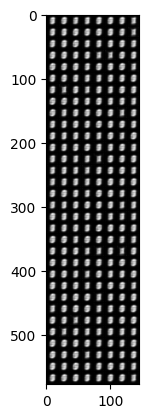

Epoch [2/10], Step [235/234], Total loss : 66.060090 Recon Loss: 65.148529, KLD Loss: 0.911560: 100%|██████████| 234/234 [00:22<00:00, 10.28it/s]


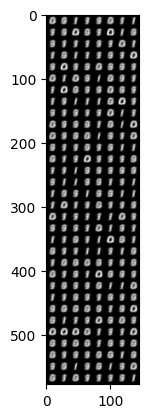

Epoch [3/10], Step [235/234], Total loss : 66.069317 Recon Loss: 65.029274, KLD Loss: 1.040043: 100%|██████████| 234/234 [00:22<00:00, 10.53it/s]


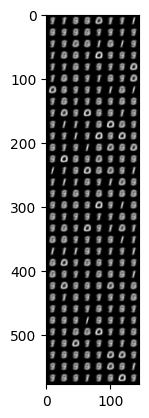

Epoch [4/10], Step [235/234], Total loss : 65.415476 Recon Loss: 64.171257, KLD Loss: 1.244219: 100%|██████████| 234/234 [00:22<00:00, 10.22it/s]


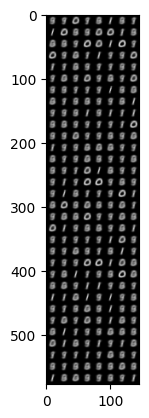

Epoch [5/10], Step [235/234], Total loss : 64.726508 Recon Loss: 63.599464, KLD Loss: 1.127043: 100%|██████████| 234/234 [00:23<00:00, 10.15it/s]


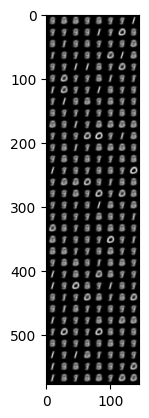

Epoch [6/10], Step [235/234], Total loss : 62.155418 Recon Loss: 60.754143, KLD Loss: 1.401275: 100%|██████████| 234/234 [00:22<00:00, 10.27it/s]


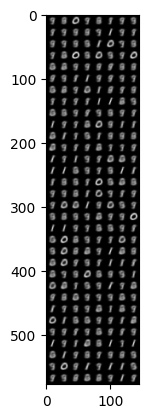

Epoch [7/10], Step [235/234], Total loss : 63.001609 Recon Loss: 61.077805, KLD Loss: 1.923805: 100%|██████████| 234/234 [00:23<00:00,  9.94it/s]


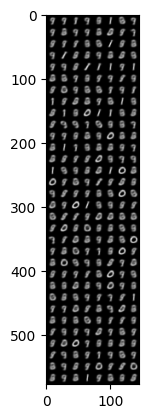

Epoch [8/10], Step [235/234], Total loss : 60.839316 Recon Loss: 58.675900, KLD Loss: 2.163417: 100%|██████████| 234/234 [00:22<00:00, 10.22it/s]


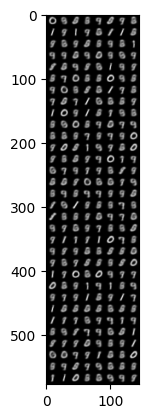

Epoch [9/10], Step [235/234], Total loss : 61.154784 Recon Loss: 58.986046, KLD Loss: 2.168738: 100%|██████████| 234/234 [00:23<00:00,  9.91it/s]


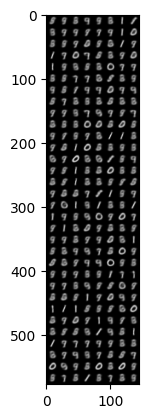

Epoch [10/10], Step [235/234], Total loss : 61.503258 Recon Loss: 59.207100, KLD Loss: 2.296158: 100%|██████████| 234/234 [00:24<00:00,  9.60it/s]


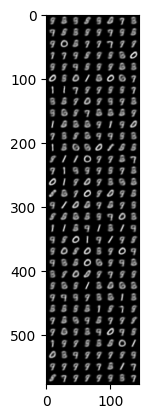

Saving gif file...


In [ ]:
from VAE import *
from utils import initialize_weights
config.beta = 2
train_loader = dataloader(train=True, batch_size=config.batch_size)
test_loader = dataloader(train=False, batch_size=config.batch_size)
encoder = Encoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,model_name='VAE').to(device)
decoder = Decoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,expand_dim=config.expand_dim).to(device)
encoder.apply(initialize_weights)
decoder.apply(initialize_weights)
trainer = training_VAE(train_loader, test_loader,encoder, decoder, device, config, \
                       save_img=True,model_name='beta_VAE',beta=config.beta,img_show=True)
results_beta_VAE = trainer.train()

In [ ]:
trained_encoder_beta_VAE = results_beta_VAE['encoder']
trained_decoder_beta_VAE = results_beta_VAE['decoder']
recon_loss_beta_VAE= results_beta_VAE['Recon_loss_history']
KLD_loss_beta_VAE= results_beta_VAE['KLD_loss_history']

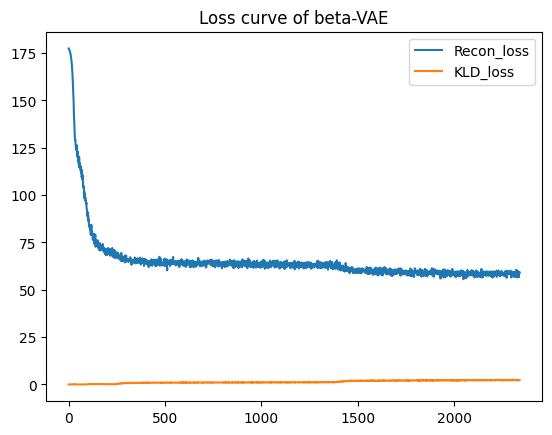

In [ ]:
plt.title("Loss curve of beta-VAE")
plt.plot(recon_loss_beta_VAE, label='Recon_loss')
plt.plot(KLD_loss_beta_VAE, label='KLD_loss')
plt.legend()

In [ ]:
from VAE import dataloader
import math
test_loader = dataloader(train=False, batch_size=64)
num_col=8
for batch_idx, (image, label) in enumerate(test_loader):
    image = (image).to(device)
    param = trained_encoder_AE(image)
    output_AE = trained_decoder_AE(param)
    grid_output_AE = torchvision.utils.make_grid(output_AE, nrow=num_col, normalize=True).cpu().detach().permute(1,2,0).numpy()
    mu, log_var, reparam = trained_encoder_VAE(image)
    output_VAE = trained_decoder_VAE(reparam)
    grid_output_VAE = torchvision.utils.make_grid(output_VAE, nrow=num_col, normalize=True).cpu().detach().permute(1,2,0).numpy()
    mu, log_var, beta_reparam = trained_encoder_beta_VAE(image)
    output_beta_VAE = trained_decoder_beta_VAE(beta_reparam)
    grid_output_beta_VAE = torchvision.utils.make_grid(output_beta_VAE, nrow=num_col, normalize=True).cpu().detach().permute(1,2,0).numpy()
    break

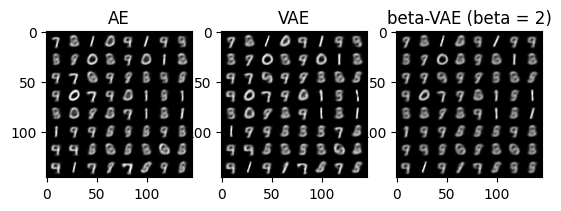

In [ ]:
plt.subplot(1,3,1)
plt.title("AE")
plt.imshow(grid_output_AE)
plt.subplot(1,3,2)
plt.title("VAE")
plt.imshow(grid_output_VAE)
plt.subplot(1,3,3)
plt.title(f"beta-VAE (beta = {config.beta})")
plt.imshow(grid_output_beta_VAE)

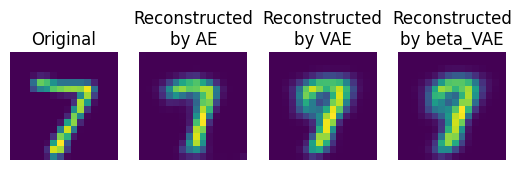

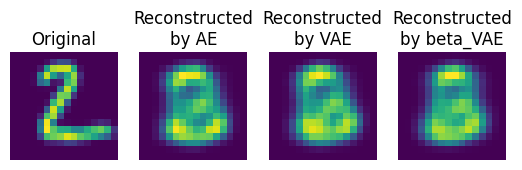

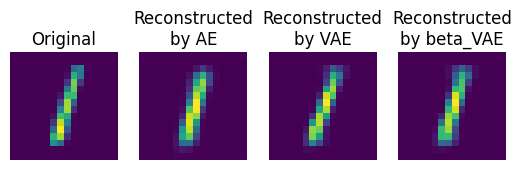

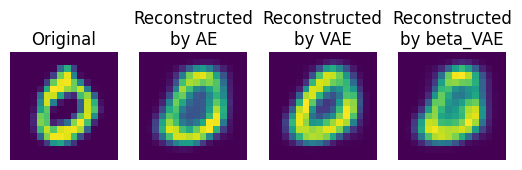

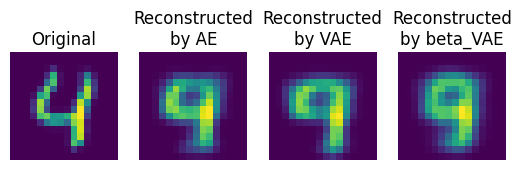

In [ ]:
output = {'AE':output_AE.detach().cpu().numpy(),
          'VAE':output_VAE.detach().cpu().numpy(),
          'beta_VAE':output_beta_VAE.detach().cpu().numpy()}
show_image_real_and_VAE(image,output,num_img=5)


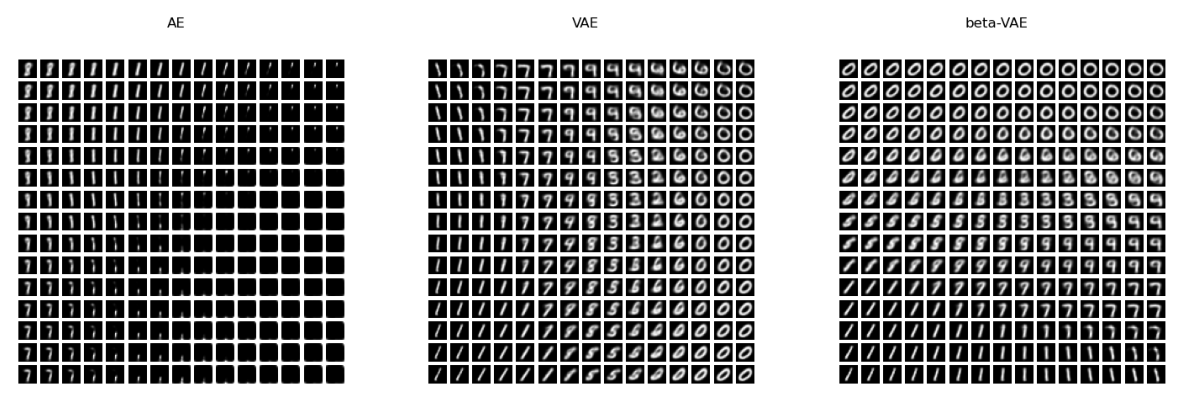

In [ ]:
AE_img = cv2.imread("./test_file/AE_latent_vector_img.png")
VAE_img = cv2.imread("./test_file/VAE_latent_vector_img.png")
beta_VAE_img = cv2.imread("./test_file/beta_VAE_latent_vector_img.png")
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(AE_img)
plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(VAE_img)
plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(beta_VAE_img)

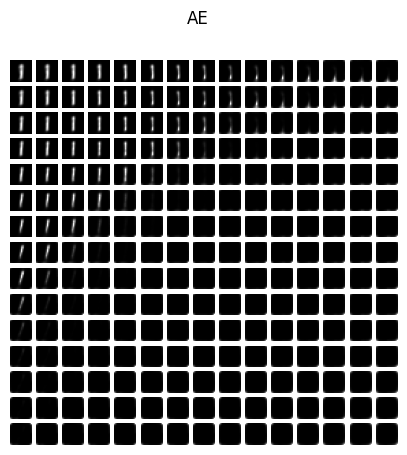

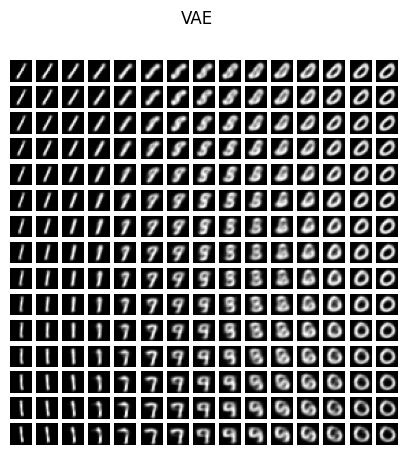

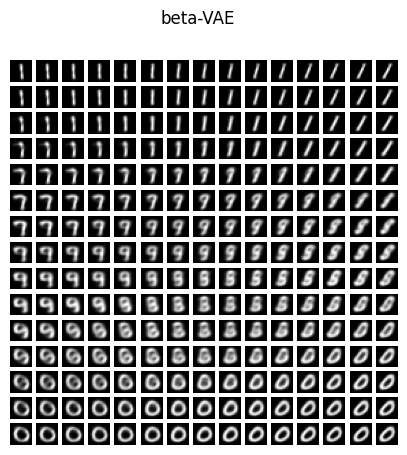

In [ ]:
config.latent_dim = 2
show_image_VAE('AE',trained_decoder_AE,config.latent_dim,size=15)
plt.pause(0.01)
show_image_VAE('VAE',trained_decoder_VAE,config.latent_dim,size=15)
plt.pause(0.01)
show_image_VAE('beta-VAE',trained_decoder_beta_VAE,config.latent_dim,size=15)
plt.pause(0.01)

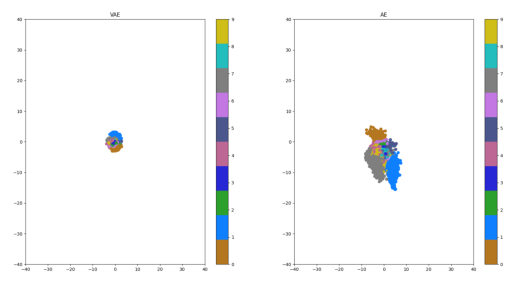

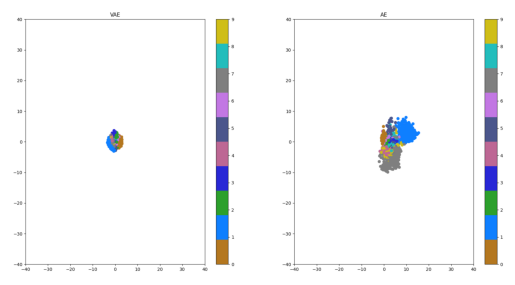

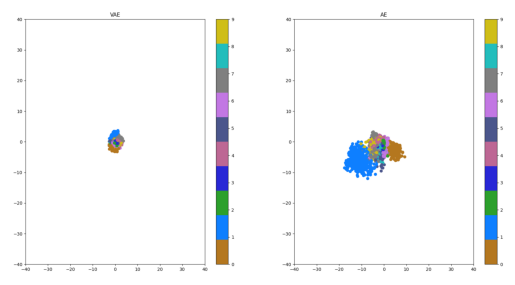

In [ ]:
import cv2
import matplotlib.pyplot as plt
output = cv2.imread("./test_file/VAE_AE_output.png")
plt.axis('off')
plt.imshow(output)
plt.pause(0.01)
output = cv2.imread("./test_file/VAE_AE_output_1.png")
plt.axis('off')
plt.imshow(output)
plt.pause(0.01)
output = cv2.imread("./test_file/VAE_AE_output_2.png")
plt.axis('off')
plt.imshow(output)

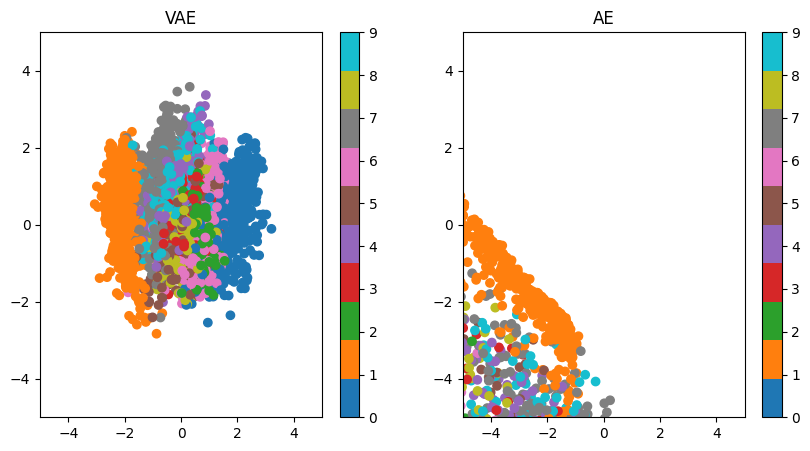

In [ ]:
plt.figure(figsize=(10,5))
visualize_latent_dim(trained_encoder_VAE, title='VAE',position='left')
visualize_latent_dim(trained_encoder_AE, title='AE',position='right')

In [ ]:
from VAE import *
VAEs = []
config.epoch = 20
for latent_dim in [5,10]:
    # train VAE
    config.latent_dim = latent_dim
    train_loader = dataloader(train=True, batch_size=config.batch_size)
    test_loader = dataloader(train=False, batch_size=config.batch_size)
    encoder_high_dim = Encoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,model_name='VAE').to(device)
    decoder_high_dim = Decoder(hidden_dims = config.hidden_dims, latent_dim=config.latent_dim,expand_dim=config.expand_dim).to(device)

    trainer_high_dim = training_VAE(train_loader, test_loader,encoder_high_dim, decoder_high_dim, device, config, \
                           save_img=False,model_name='VAE',beta=1,img_show=False)
    results_high_dim = trainer_high_dim.train()
    trained_encoder_VAE_high_dim = results_high_dim['encoder']
    trained_decoder_VAE_high_dim = results_high_dim['decoder']
    VAEs.append((latent_dim,trained_encoder_VAE_high_dim,trained_decoder_VAE_high_dim))

Epoch [1/20], Step [235/234], Total loss : 63.539051 Recon Loss: 60.982922, KLD Loss: 2.556130: 100%|██████████| 234/234 [00:22<00:00, 10.61it/s]
Epoch [2/20], Step [235/234], Total loss : 58.595080 Recon Loss: 53.670929, KLD Loss: 4.924151: 100%|██████████| 234/234 [00:22<00:00, 10.41it/s]
Epoch [3/20], Step [235/234], Total loss : 56.483979 Recon Loss: 51.361614, KLD Loss: 5.122365: 100%|██████████| 234/234 [00:22<00:00, 10.60it/s]
Epoch [4/20], Step [235/234], Total loss : 54.500545 Recon Loss: 48.560017, KLD Loss: 5.940528: 100%|██████████| 234/234 [00:22<00:00, 10.43it/s]
Epoch [5/20], Step [235/234], Total loss : 55.390855 Recon Loss: 49.367340, KLD Loss: 6.023515: 100%|██████████| 234/234 [00:22<00:00, 10.44it/s]
Epoch [6/20], Step [235/234], Total loss : 56.109262 Recon Loss: 49.901199, KLD Loss: 6.208063: 100%|██████████| 234/234 [00:22<00:00, 10.49it/s]
Epoch [7/20], Step [235/234], Total loss : 54.779336 Recon Loss: 48.507435, KLD Loss: 6.271901: 100%|██████████| 234/234 [00

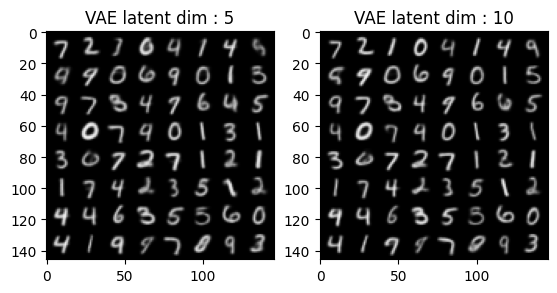

In [ ]:
from VAE import dataloader
test_loader = dataloader(train=False, batch_size=64)
for image,label in test_loader:
    image = image.to(device)
    break
plt.figure(figsize=(10, 10))
eps = torch.randn(64, 20).to(device)
for i in range(len(VAEs)):
    latent_dim,trained_encoder_VAE,trained_decoder_VAE = VAEs[i]
    _, _, rp = trained_encoder_VAE(image,eps[:,:latent_dim])
    output = trained_decoder_VAE(rp)
    output = torchvision.utils.make_grid(output.cpu().detach(), nrow=8)
    output = output.numpy().transpose(1,2,0)
    plt.subplot(1,3, i+1)
    plt.title(f"VAE latent dim : {latent_dim}")
    plt.imshow(output)